# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
units = "metric"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | markova
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | tongliao
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | xichang
Processing Record 13 of Set 1 | rio grande
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | alta floresta
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | glenwood springs
Processing Record 20 of Set 1 | belaya gora
Processing Record 21 of Set 1 | 

Processing Record 39 of Set 4 | kidal
Processing Record 40 of Set 4 | fort nelson
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
Processing Record 42 of Set 4 | san quintin
Processing Record 43 of Set 4 | ban tak
Processing Record 44 of Set 4 | dingli
Processing Record 45 of Set 4 | vangaindrano
Processing Record 46 of Set 4 | taoudenni
Processing Record 47 of Set 4 | gillette
Processing Record 48 of Set 4 | kuala lipis
Processing Record 49 of Set 4 | cayenne
Processing Record 0 of Set 5 | shimanovsk
Processing Record 1 of Set 5 | sinnamary
Processing Record 2 of Set 5 | buala
Processing Record 3 of Set 5 | huzhou
Processing Record 4 of Set 5 | san pedro
Processing Record 5 of Set 5 | innisfail
Processing Record 6 of Set 5 | klamath falls
Processing Record 7 of Set 5 | omsukchan
Processing Record 8 of Set 5 | bismarck
Processing Record 9 of Set 5 | halifax
Processing Record 10 of Set 5 | taboga
Processing Record 11 of Set 5 | zlotow
Processing Record 12 of Set 5 | 

Processing Record 33 of Set 8 | san patricio
Processing Record 34 of Set 8 | krasnooktyabrskiy
Processing Record 35 of Set 8 | ende
Processing Record 36 of Set 8 | coxim
Processing Record 37 of Set 8 | kutahya
Processing Record 38 of Set 8 | pacifica
Processing Record 39 of Set 8 | rudbar
Processing Record 40 of Set 8 | yarmouth
Processing Record 41 of Set 8 | puerto escondido
Processing Record 42 of Set 8 | srednekolymsk
Processing Record 43 of Set 8 | kozhevnikovo
Processing Record 44 of Set 8 | cimitarra
Processing Record 45 of Set 8 | muroto
Processing Record 46 of Set 8 | dongsheng
Processing Record 47 of Set 8 | kingussie
Processing Record 48 of Set 8 | agara
Processing Record 49 of Set 8 | ahipara
Processing Record 0 of Set 9 | madison heights
Processing Record 1 of Set 9 | bathsheba
Processing Record 2 of Set 9 | kamenskoye
City not found. Skipping...
Processing Record 3 of Set 9 | high level
Processing Record 4 of Set 9 | stornoway
Processing Record 5 of Set 9 | sagua la grand

Processing Record 21 of Set 12 | coquimbo
Processing Record 22 of Set 12 | aykhal
Processing Record 23 of Set 12 | meadow lake
Processing Record 24 of Set 12 | lubao
Processing Record 25 of Set 12 | haines junction
Processing Record 26 of Set 12 | sexsmith
Processing Record 27 of Set 12 | masingbi
Processing Record 28 of Set 12 | margate
Processing Record 29 of Set 12 | yemelyanovo
Processing Record 30 of Set 12 | moorhead
Processing Record 31 of Set 12 | pravia
Processing Record 32 of Set 12 | charlestown
Processing Record 33 of Set 12 | capao bonito
Processing Record 34 of Set 12 | sayyan
Processing Record 35 of Set 12 | poum
Processing Record 36 of Set 12 | luang prabang
Processing Record 37 of Set 12 | reconquista
Processing Record 38 of Set 12 | tshikapa
Processing Record 39 of Set 12 | rongcheng
Processing Record 40 of Set 12 | azimur
City not found. Skipping...
Processing Record 41 of Set 12 | mrirt
City not found. Skipping...
Processing Record 42 of Set 12 | bulalacao
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,2.77,51,0,10.29,US,1678226377
1,port alfred,-33.5906,26.8910,21.21,94,100,0.45,ZA,1678226205
2,alofi,-19.0595,-169.9187,24.94,22,75,3.09,NU,1678226199
3,ushuaia,-54.8000,-68.3000,10.81,58,75,3.09,AR,1678226175
4,markova,48.6758,24.4138,0.37,83,76,2.27,UA,1678226431


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,2.77,51,0,10.29,US,1678226377
1,port alfred,-33.5906,26.8910,21.21,94,100,0.45,ZA,1678226205
2,alofi,-19.0595,-169.9187,24.94,22,75,3.09,NU,1678226199
3,ushuaia,-54.8000,-68.3000,10.81,58,75,3.09,AR,1678226175
4,markova,48.6758,24.4138,0.37,83,76,2.27,UA,1678226431


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

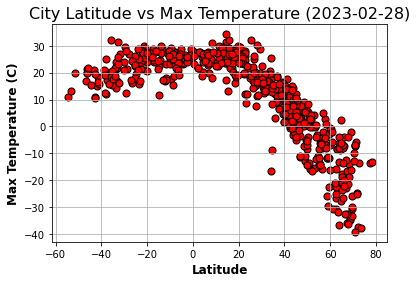

In [8]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], 
            marker='o', edgecolor='black', s=50)
plt.title("Latitude vs Max Temp (2023-02-28)", fontsize = 16)
plt.xlabel("Latitude", fontweight='bold', fontsize = 12)
plt.ylabel("Max Temperature (C)", fontweight='bold', fontsize = 12)
plt.grid()
#plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

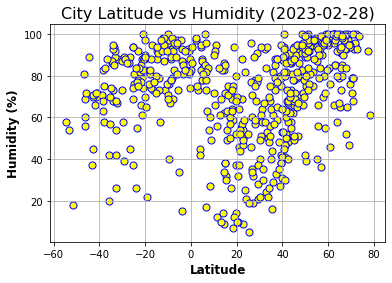

In [9]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], 
            marker='o', edgecolor='black', s=50)
plt.title("Latitude vs Humidity (2023-02-28)", fontsize = 16)
plt.xlabel("Latitude", fontweight='bold', fontsize = 12)
plt.ylabel("Humidity (%)", fontweight='bold', fontsize = 12)
plt.grid()
#plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

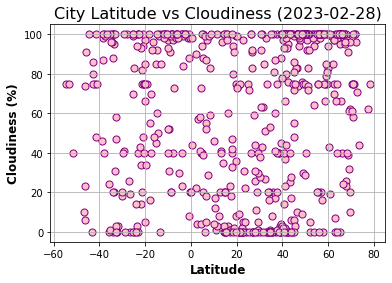

In [10]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], 
            marker='o', edgecolor='black', s=50)
plt.title("Latitude vs Cloudiness (2023-02-28)", fontsize = 16)
plt.xlabel("Latitude", fontweight='bold', fontsize = 12)
plt.ylabel("Cloudiness (%)", fontweight='bold', fontsize = 12)
plt.grid()
#plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

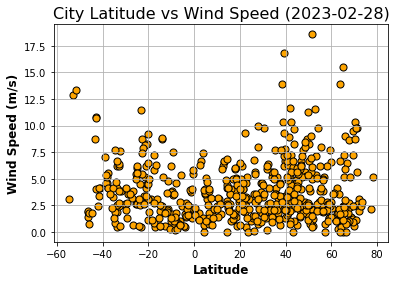

In [11]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], 
            marker='o', edgecolor='black', s=50)
plt.title("Latitude vs Wind Speed (2023-02-28)", fontsize = 16)
plt.xlabel("Latitude", fontweight='bold', fontsize = 12)
plt.ylabel("Wind Speed (m/s)", fontweight='bold', fontsize = 12)
plt.grid()
#plt.savefig("output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,2.77,51,0,10.29,US,1678226377
4,markova,48.6758,24.4138,0.37,83,76,2.27,UA,1678226431
6,victoria,22.2855,114.1577,19.62,88,1,2.68,HK,1678226209
7,tongliao,43.6125,122.2653,-3.19,58,6,2.93,CN,1678226192
9,yellowknife,62.4560,-114.3525,-15.71,66,75,4.12,CA,1678226183


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,21.21,94,100,0.45,ZA,1678226205
2,alofi,-19.0595,-169.9187,24.94,22,75,3.09,NU,1678226199
3,ushuaia,-54.8000,-68.3000,10.81,58,75,3.09,AR,1678226175
5,busselton,-33.6500,115.3333,14.24,68,95,6.23,AU,1678226434
8,mahebourg,-20.4081,57.7000,25.16,88,75,3.09,MU,1678226178


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.88965


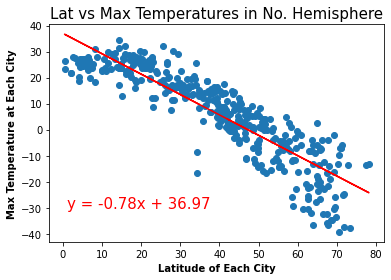

In [15]:
xAxis = northern_hemi_df["Lat"]
yAxis = northern_hemi_df["Max Temp"]

correlation = st.pearsonr(xAxis, yAxis)
print(f"The r-value is: {correlation[0]:.5f}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xAxis, yAxis)
# gets all our intercept values
intercept_line = slope*xAxis + intercept
# y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xAxis, yAxis)
plt.plot(xAxis, intercept_line, color='red')
plt.annotate(line_eq,(1, -30),fontsize=15,color="red")
plt.xlabel("Latitude of Each City", fontweight='bold')
plt.ylabel("Max Temperature at Each City", fontweight='bold')
plt.title("Lat vs Max Temperatures in No. Hemisphere", fontsize=15)
plt.show()

The r-value is: 0.51578


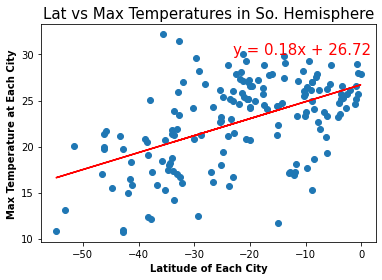

In [16]:
# Linear regression on Southern Hemisphere
xNext = southern_hemi_df["Lat"]
yNext = southern_hemi_df["Max Temp"]

correlation = st.pearsonr(xNext, yNext)
print(f"The r-value is: {correlation[0]:.5f}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNext, yNext)
# gets all our intercept values
intercept_line = slope*xNext + intercept
# y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xNext, yNext)
plt.plot(xNext, intercept_line, color='red')
plt.annotate(line_eq,(-23, 30),fontsize=15,color="red")
plt.xlabel("Latitude of Each City", fontweight='bold')
plt.ylabel("Max Temperature at Each City", fontweight='bold')
plt.title("Lat vs Max Temperatures in So. Hemisphere", fontsize=15)
plt.show()

**Discussion about the linear relationship:** From the northern hemisphere, we see an r value = -0.89. This means that as latitude increases, temperature tends to correlate negatively or decrease. And, becuase our r value is very close to -1, we have a very strong correlation between the 2 variables. This result makes much sense as we know Canada, Greenland, Russia, etc to all be extremely cold places while areas like Florida, Hawaii, Mexico tend to be warm year round. In the southern hemisphere, we see a moderate positive correlation as r = 0.52. This one also makes a lot of sense. The southern hemisphere is home to the coldest place on earth in Antarctica, but very few other countries are cold in the hemisphere. It contains areas like australia, south africa/africa, and brazil which can get cold but nowhere near as cold as the places listed for the northern hemisphere. Hence, a moderate (less than strong) correlation makes sense. Also, we have the opposite sign since we are moving up to the equator rather than down.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.41572


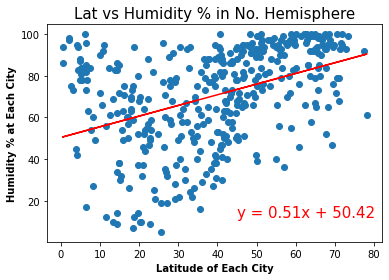

In [17]:
#Northern Hemisphere
xNext = northern_hemi_df["Lat"]
yNext = northern_hemi_df["Humidity"]

correlation = st.pearsonr(xNext, yNext)
print(f"The r-value is: {correlation[0]:.5f}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNext, yNext)
# gets all our intercept values
intercept_line = slope*xNext + intercept
# y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xNext, yNext)
plt.plot(xNext, intercept_line, color='red')
plt.annotate(line_eq,(45, 12),fontsize=15,color="red")
plt.xlabel("Latitude of Each City", fontweight='bold')
plt.ylabel("Humidity % at Each City", fontweight='bold')
plt.title("Lat vs Humidity % in No. Hemisphere", fontsize=15)
plt.show()

The r-value is: 0.35907


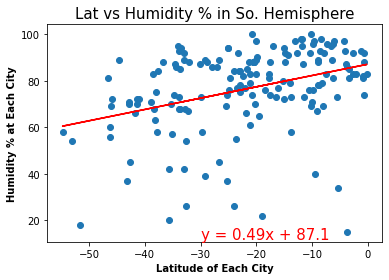

In [18]:
# Southern Hemisphere
xNext = southern_hemi_df["Lat"]
yNext = southern_hemi_df["Humidity"]

correlation = st.pearsonr(xNext, yNext)
print(f"The r-value is: {correlation[0]:.5f}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNext, yNext)
# gets all our intercept values
intercept_line = slope*xNext + intercept
# y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xNext, yNext)
plt.plot(xNext, intercept_line, color='red')
plt.annotate(line_eq,(-30, 12),fontsize=15,color="red")
plt.xlabel("Latitude of Each City", fontweight='bold')
plt.ylabel("Humidity % at Each City", fontweight='bold')
plt.title("Lat vs Humidity % in So. Hemisphere", fontsize=15)
plt.show()

**Discussion about the linear relationship:** In our northern hemisphere, we see an r value = .42 showing a weak correlation between humidity % and latitude. This means as latitude increases, humidity does as well. This is somehat suprising since we view "the south" of the US to be the most humid place in the country, although we also do know the southwest (California, Arizona, Nevada) to be extremely dry. So, as we go more north, humidity will tend to increase. In the southern hemisphere, we see an r value = .36 showing the same type of relationship interestingly enough (a weak positive one). So, as latitude increases, humidity % slightly increases as well. As surprising as the northern hemisphere result was, this one makes much more sense. We know the tropics to be a very humid area whereas Antarctica (lowest latitude in the world) to be the most dry place on the planet.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.32559


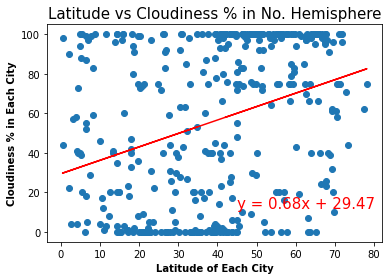

In [19]:
# Northern Hemisphere
xNext = northern_hemi_df["Lat"]
yNext = northern_hemi_df["Cloudiness"]

correlation = st.pearsonr(xNext, yNext)
print(f"The r-value is: {correlation[0]:.5f}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNext, yNext)
# gets all our intercept values
intercept_line = slope*xNext + intercept
# y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xNext, yNext)
plt.plot(xNext, intercept_line, color='red')
plt.annotate(line_eq,(45, 12),fontsize=15,color="red")
plt.xlabel("Latitude of Each City", fontweight='bold')
plt.ylabel("Cloudiness % in Each City", fontweight='bold')
plt.title("Latitude vs Cloudiness % in No. Hemisphere", fontsize=15)
plt.show()

The r-value is: 0.21761


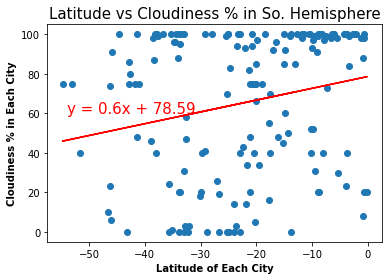

In [20]:
# Southern Hemisphere
xNext = southern_hemi_df["Lat"]
yNext = southern_hemi_df["Cloudiness"]

correlation = st.pearsonr(xNext, yNext)
print(f"The r-value is: {correlation[0]:.5f}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNext, yNext)
# gets all our intercept values
intercept_line = slope*xNext + intercept
# y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xNext, yNext)
plt.plot(xNext, intercept_line, color='red')
plt.annotate(line_eq,(-54, 60),fontsize=15,color="red")
plt.xlabel("Latitude of Each City", fontweight='bold')
plt.ylabel("Cloudiness % in Each City", fontweight='bold')
plt.title("Latitude vs Cloudiness % in So. Hemisphere", fontsize=15)
plt.show()

**Discussion about the linear relationship:** In our northen hemisphere, we see an r value decently above 0 (0.33). Hence, if our latitude increases, then our cloudiness % will tend to slightly increases and vice-a-versa. Though the 2 do have a weak correlation, a correlation nonetheless still exists. This is a sensical result since places like the northeast, northwest, and midwest tend to have much more clouds than places like arizona, california, or mexico. In our southern hemisphere, we see an r value barely above 0 (0.21). So, latitude and cloudiness % in the southern hemisphere have a very weak positive correlation. Meaning, as latitude increases (gets closer to the equator), cloudiness will either sightly increase or have no change. I don't know the southern hemisphere as well, but it is interesting that the signs of r values for southern and northern are not opposite, even though they are both weak to very weak correlations.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09044


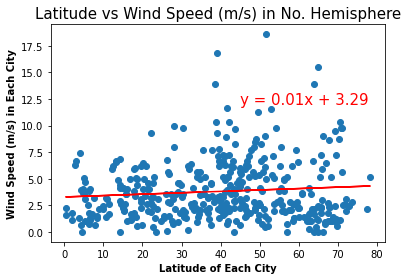

In [21]:
# Northern Hemisphere
xNext = northern_hemi_df["Lat"]
yNext = northern_hemi_df["Wind Speed"]

correlation = st.pearsonr(xNext, yNext)
print(f"The r-value is: {correlation[0]:.5f}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNext, yNext)
# gets all our intercept values
intercept_line = slope*xNext + intercept
# y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xNext, yNext)
plt.plot(xNext, intercept_line, color='red')
plt.annotate(line_eq,(45, 12),fontsize=15,color="red")
plt.xlabel("Latitude of Each City", fontweight='bold')
plt.ylabel("Wind Speed (m/s) in Each City", fontweight='bold')
plt.title("Latitude vs Wind Speed (m/s) in No. Hemisphere", fontsize=15)
plt.show()

The r-value is: -0.31742


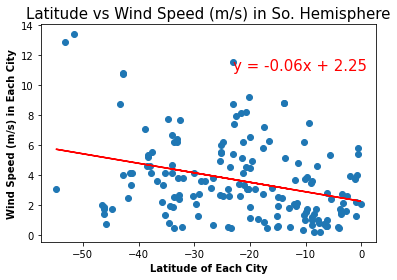

In [22]:
# Southern Hemisphere
xNext = southern_hemi_df["Lat"]
yNext = southern_hemi_df["Wind Speed"]

correlation = st.pearsonr(xNext, yNext)
print(f"The r-value is: {correlation[0]:.5f}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xNext, yNext)
# gets all our intercept values
intercept_line = slope*xNext + intercept
# y = mx + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xNext, yNext)
plt.plot(xNext, intercept_line, color='red')
plt.annotate(line_eq,(-23, 11),fontsize=15,color="red")
plt.xlabel("Latitude of Each City", fontweight='bold')
plt.ylabel("Wind Speed (m/s) in Each City", fontweight='bold')
plt.title("Latitude vs Wind Speed (m/s) in So. Hemisphere", fontsize=15)
plt.show()

**Discussion about the linear relationship:** For our northern hemisphere, we see a slightly above 0 r value (0.09). This tells us that latitude and wind speed in the northern hemisphere has almost no correlation or a very weak one, so as latitude increases, wind speed increases as slightly as possible. For our southern hemisphere, we see an r value decently below 0 (-0.31). This tells us that latitude and wind speed in the southern hemisphere have a weak negative correlation. This means that as latitude increases (as we get closer to the equator), wind speed tends to slightly decreases, which makes sense.